# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.utils import plot_model
from PIL import Image


Using TensorFlow backend.


## Load Training Data

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11501568/11490434 [==============================] - 1s 0us/step
('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))


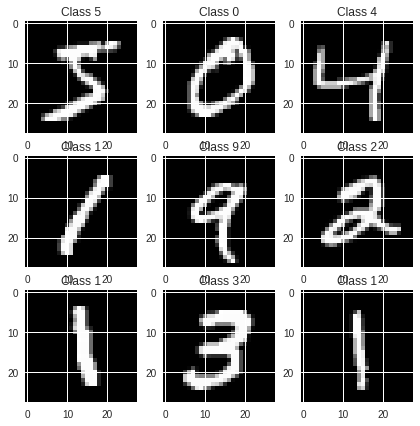

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(np.reshape(X_train[i,:],(28,28)), cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))
    
im=Image.fromarray(np.reshape(X_train[2,:],(28,28)))
im.show()

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

('Training matrix shape', (60000, 784))
('Testing matrix shape', (10000, 784))


In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the network

In [0]:
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dense(512))
#model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

## Compile the model

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
#plot_model(model, to_file='model.png',show_shapes=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_11 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
__________

## Train the model

In [17]:
model.fit(X_train, Y_train,
          batch_size=128, nb_epoch=8,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 2s 41us/step - loss: 0.1616 - acc: 0.9511 - val_loss: 0.1171 - val_acc: 0.9651
Epoch 2/8
60000/60000 [==============================] - 2s 40us/step - loss: 0.1612 - acc: 0.9494 - val_loss: 0.1197 - val_acc: 0.9639
Epoch 3/8
60000/60000 [==============================] - 2s 38us/step - loss: 0.1581 - acc: 0.9509 - val_loss: 0.1155 - val_acc: 0.9657
Epoch 4/8
60000/60000 [==============================] - 2s 39us/step - loss: 0.1556 - acc: 0.9518 - val_loss: 0.1118 - val_acc: 0.9665
Epoch 5/8
60000/60000 [==============================] - 2s 38us/step - loss: 0.1528 - acc: 0.9527 - val_loss: 0.1205 - val_acc: 0.9646
Epoch 6/8
10368/60000 [====>.........................] - ETA: 1s - loss: 0.1564 - acc: 0.9512

60000/60000 [==============================] - 2s 37us/step - loss: 0.1517 - acc: 0.9538 - val_loss: 0.1135 - val_acc: 0.9645
Epoch 7/8
60000/60000 [==============================] - 2s 37us/step - loss: 0.1488 - acc: 0.9533 - val_loss: 0.1129 - val_acc: 0.9652
Epoch 8/8
60000/60000 [==============================] - 2s 37us/step - loss: 0.1479 - acc: 0.9534 - val_loss: 0.1143 - val_acc: 0.9638


## Evaluation

In [25]:
score = model.evaluate(X_test, Y_test,
                       verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 0.1142820839120075)
('Test accuracy:', 0.9638)


In [0]:
pred = model.predict(X_test)

In [29]:
np.argmax(pred[0])

7

In [0]:
model.save('/model.h5')

In [0]:
model.load_weights('/model.h5')